All instructions are provided for R. I am going to reproduce them in Python as best as I can.

# Preface

From the textbook, p. 56:
> This exercise involves the Boston housing data set.

This dataset happens to [be present](https://scikit-learn.org/stable/datasets/toy_dataset.html#boston-dataset) in Sci-kit Learn collection of datasets; I am going to use this.

**Important note:** there was an update to this dataset: some errors were corrected and 6 new columns were added (one of which, CMEDV, contains corrections and the rest are location data). An article on this topic is [here](https://towardsdatascience.com/things-you-didnt-know-about-the-boston-housing-dataset-2e87a6f960e8); the complete description of the corrected dataset is [here](https://nowosad.github.io/spData/reference/boston.html); the data is sourced from [here](http://lib.stat.cmu.edu/datasets/boston_corrected.txt).

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston


%matplotlib inline
sns.set()

# (a)

From the textbook, p. 56:
> To begin, load in the Boston data set. The Boston data set is
part of the MASS library in R.
```
> library ( MASS )
```
Now the data set is contained in the object Boston.
```
> Boston
```
Read about the data set:
```
> ?Boston
```
How many rows are in this data set? How many columns? What
do the rows and columns represent?

In [2]:
boston = load_boston()
# Because this exercise requires all features to be in one table,
# loading straight from the CSV is easier.
bostondf = pd.read_csv(boston.filename, skiprows=1)
bostondf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

The dataset is 506 rows by 14 columns.

Columns:
* `CRIM` &mdash; per capita crime rate by town,
* `ZN` &mdash; proportion of residential land zoned for lots over 25,000 sq.ft.,
* `INDUS` &mdash; proportion of non-retail business acres per town,
* `CHAS` &mdash; Charles River dummy variable (= 1 if tract bounds river; 0 otherwise),
* `NOX` &mdash; nitric oxides concentration (parts per 10 million),
* `RM` &mdash; average number of rooms per dwelling,
* `AGE` &mdash; proportion of owner-occupied units built prior to 1940,
* `DIS` &mdash; weighted distances to five Boston employment centres,
* `RAD` &mdash; index of accessibility to radial highways,
* `TAX` &mdash; full-value property-tax rate per \$10,000;
* `PTRATIO` &mdash; pupil-teacher ratio by town,
* `B` &mdash; 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town,
* `LSTAT` &mdash; % lower status of the population
* `MEDV` &mdash; Median value of owner-occupied homes in \$1000’s.

`CHAS` and, perhaps, `RAD` are categorical.



# (b)

From the textbook, p. 56:
> Make some pairwise scatterplots of the predictors (columns) in
this data set. Describe your findings.

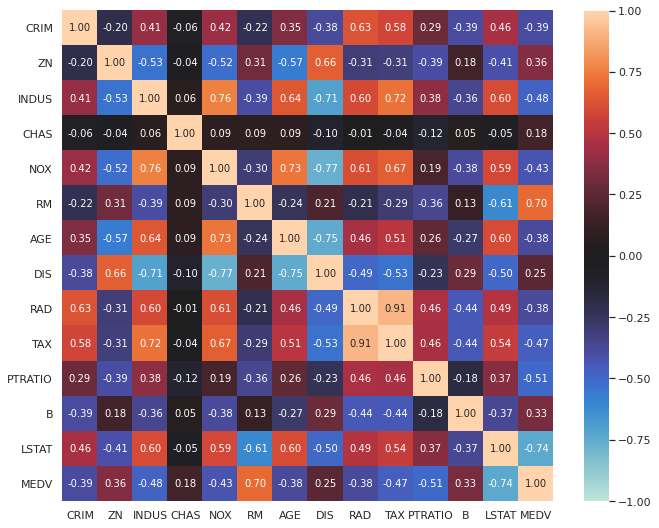

In [4]:
fig = plt.figure(figsize=(11, 11))
sns.heatmap(bostondf.corr()
            , annot=True
            , fmt='.2f'
            , vmin=-1
            , vmax=1
            , cmap=sns.color_palette('icefire', as_cmap=True)
            , square=True
            , cbar_kws={'shrink' : 0.82}
           )
plt.show()

The elephant in the room: `CHAS` does not directly affect any other variable in the dataset.

There is one strong correlation and a bunch of moderate ones. Let's plot the ones that are 0.7 of higher by absolute value.

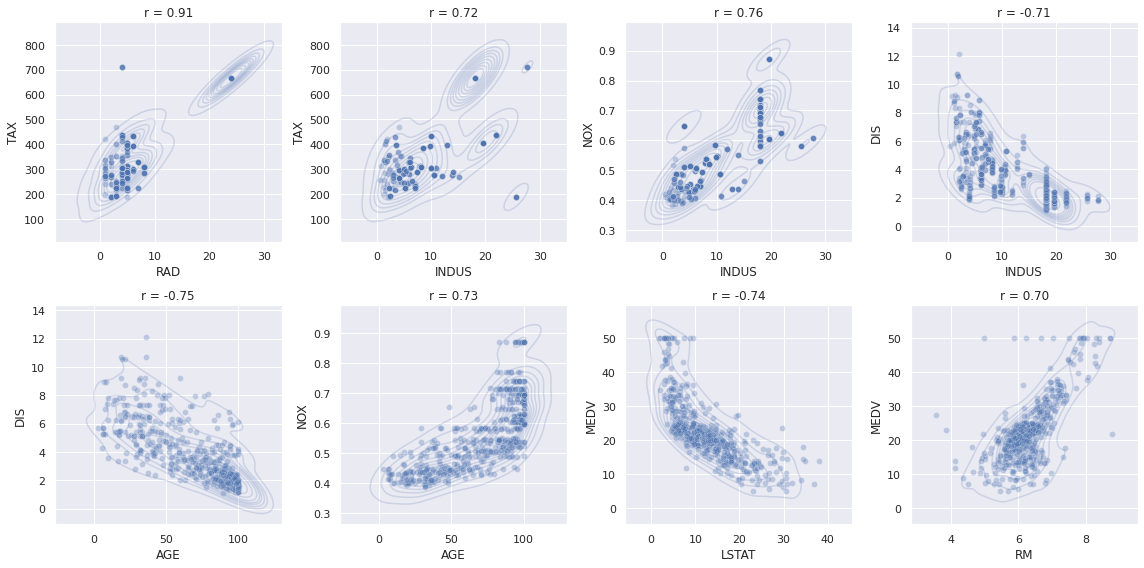

In [5]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axs = axs.flatten()

vars_in_order = [
  ['RAD', 'TAX']
  , ['INDUS', 'TAX']
  , ['INDUS', 'NOX']
  , ['INDUS', 'DIS']
  , ['AGE', 'DIS']
  , ['AGE', 'NOX']
  , ['LSTAT', 'MEDV']
  , ['RM', 'MEDV']
]

for ax, (x, y) in zip(axs, vars_in_order):
  sns.scatterplot(x=x, y=y, data=bostondf, ax=ax, alpha=0.3)
  sns.kdeplot(x=x, y=y, data=bostondf, ax=ax, alpha=0.2)
  r = bostondf[x].corr(bostondf[y])
  ax.set_title(f'r = {r:.2f}')

plt.tight_layout()

You can notice that, despite having the largest correlation coefficient, the relationship between `RAD` and `TAX` does not look very ordered. This happens, because there is a huge cluster of overlapping points at (24, 666).

In [6]:
# Find out the size of the cluster of points on the RAD - TAX plot:
is_weird_cluster = (bostondf.RAD == 24) & (bostondf.TAX == 666)
is_weird_cluster.sum()

132

There are 132 such points. This is about the fourth of the whole dataset. I guess, this is downtown Boston: huge tax rate, a lot of radial highways are available.

## *Weird Cluster* side-quest

Let's see if location data from the [corrected dataset](http://lib.stat.cmu.edu/datasets/boston_corrected.txt') would help to demystify the weird cluster of towns.

In [7]:
# Corrected Boston dataset:
cb = pd.read_csv('http://lib.stat.cmu.edu/datasets/boston_corrected.txt'
                 , skiprows=9
                 , sep='\t'
                )

print('Weird Cluster towns:')
print(np.sort(cb[is_weird_cluster].TOWN.unique()), end='\n\n')
print('Other towns:')
print(np.sort(cb[~is_weird_cluster].TOWN.unique()))

Weird Cluster towns:
['Boston Allston-Brighton' 'Boston Back Bay' 'Boston Beacon Hill'
 'Boston Charlestown' 'Boston Dorchester' 'Boston Downtown'
 'Boston East Boston' 'Boston Forest Hills' 'Boston Hyde Park'
 'Boston Mattapan' 'Boston North End' 'Boston Roxbury' 'Boston Savin Hill'
 'Boston South Boston' 'Boston West Roxbury']

Other towns:
['Arlington' 'Ashland' 'Bedford' 'Belmont' 'Beverly' 'Braintree'
 'Brookline' 'Burlington' 'Cambridge' 'Canton' 'Chelsea' 'Cohasset'
 'Concord' 'Danvers' 'Dedham' 'Dover' 'Duxbury' 'Everett' 'Framingham'
 'Hamilton' 'Hanover' 'Hingham' 'Holbrook' 'Hull' 'Lexington' 'Lincoln'
 'Lynn' 'Lynnfield' 'Malden' 'Manchester' 'Marblehead' 'Marshfield'
 'Medfield' 'Medford' 'Melrose' 'Middleton' 'Millis' 'Milton' 'Nahant'
 'Natick' 'Needham' 'Newton' 'Norfolk' 'North Reading' 'Norwell' 'Norwood'
 'Peabody' 'Pembroke' 'Quincy' 'Randolph' 'Reading' 'Revere' 'Rockland'
 'Salem' 'Sargus' 'Scituate' 'Sharon' 'Sherborn' 'Somerville' 'Stoneham'
 'Sudbury' 'Swampsco

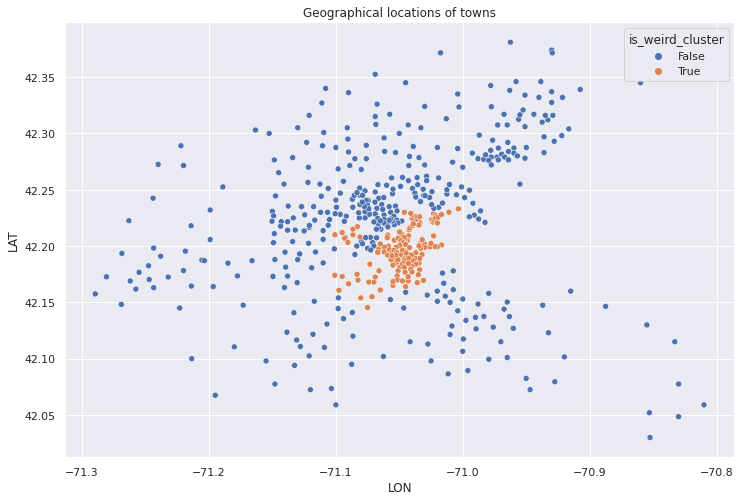

In [8]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=cb.assign(is_weird_cluster=is_weird_cluster)
                , x='LON'
                , y='LAT'
                , hue='is_weird_cluster'
               )
plt.title('Geographical locations of towns')
plt.show()

See? I was almost right: the Weird Cluster is Boston; everything else is its suburbs.

# (c)

From the textbook, p. 56:
> Are any of the predictors associated with per capita crime rate?
If so, explain the relationship.

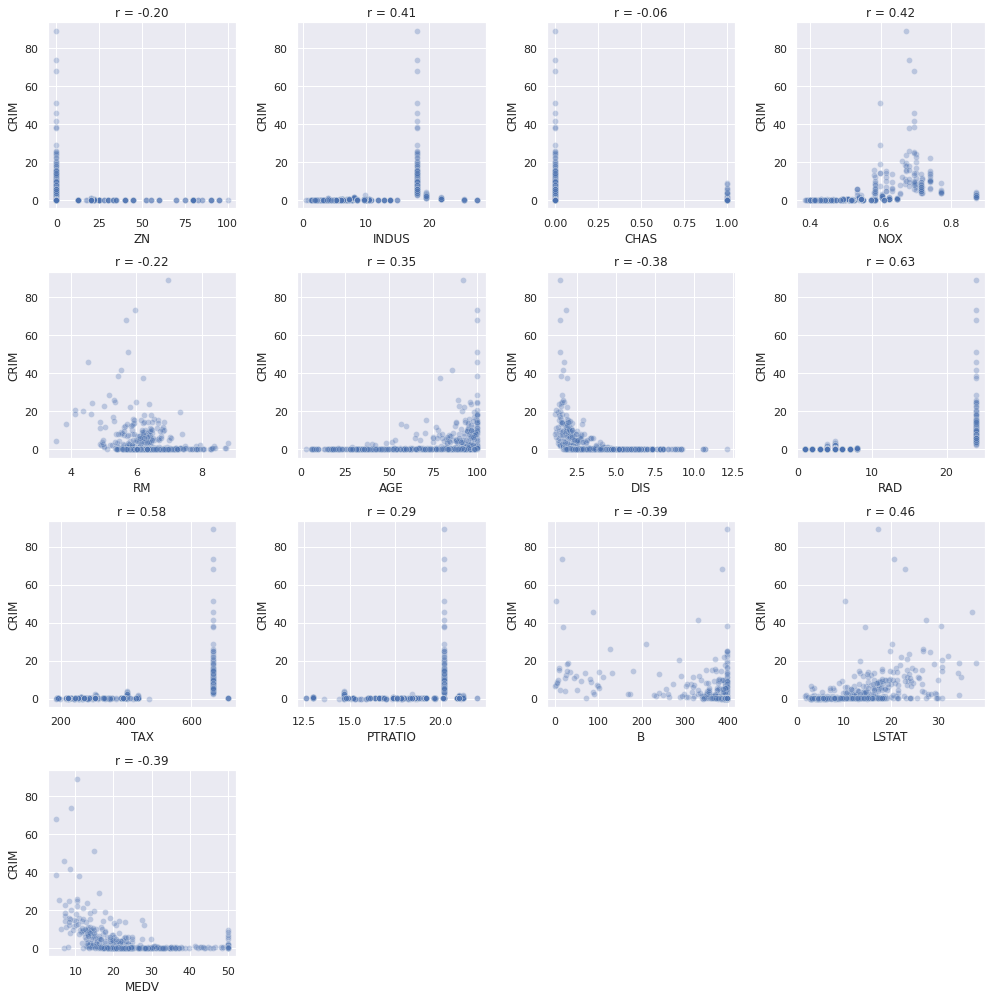

In [9]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(14, 14))
axs = axs.flatten()

vars = bostondf.columns.to_list()
vars.remove('CRIM')

for ax, x in zip(axs, vars):
  sns.scatterplot(x=x, y='CRIM', data=bostondf, ax=ax, alpha=0.3)
  r = bostondf.CRIM.corr(bostondf[x])
  ax.set_title(f'r = {r:.2f}')

plt.tight_layout()
for i in range(13, 16):
  fig.delaxes(axs[i])
plt.show()

There are several plots (`INDUS` - `CRIM`, `TAX` - `CRIM`, `PTRATIO` - `CRIM`, `RAD` - `CRIM`) where the majority of variance in `CRIM` comes from just one value of its counterpart variable. I wonder, what is going to happen if I remove the rows that contain the data for Boston (the city).

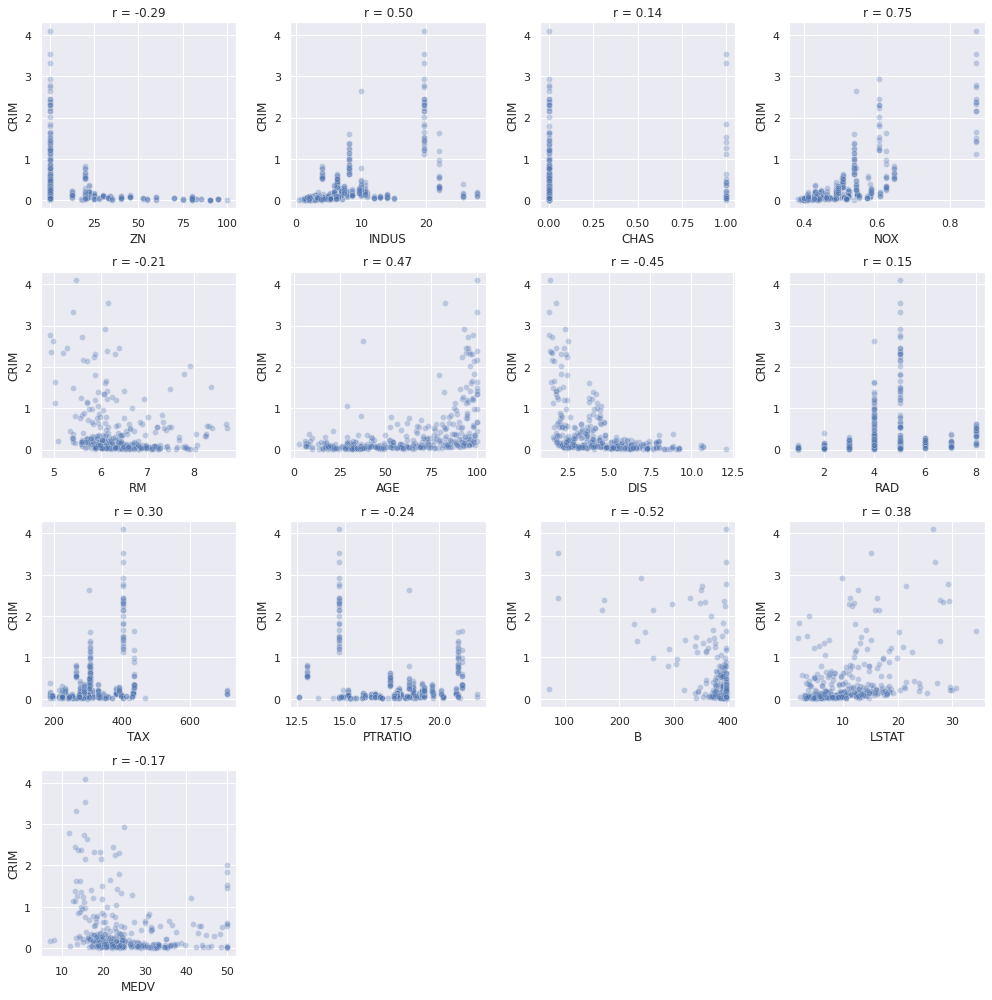

In [10]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(14, 14))
axs = axs.flatten()

for ax, x in zip(axs, vars):
  sns.scatterplot(x=x, y='CRIM', data=bostondf.loc[~is_weird_cluster], ax=ax, alpha=0.3)
  r = bostondf.loc[~is_weird_cluster, 'CRIM'].corr(bostondf.loc[~is_weird_cluster, x])
  ax.set_title(f'r = {r:.2f}')

plt.tight_layout()
for i in range(13, 16):
  fig.delaxes(axs[i])
plt.show()

The maximum value of `CRIM` has dropped from about 90 to about 4. This also revealed a moderate correlation $(r = 0.75)$ between `CRIM` and `NOX` for the suburbs. The best predictor of crime rate is being inside or outside of Boston city.

# (d)

From the textbook, p. 56:
> Do any of the suburbs of Boston appear to have particularly
high crime rates? Tax rates? Pupil-teacher ratios? Comment on
the range of each predictor.

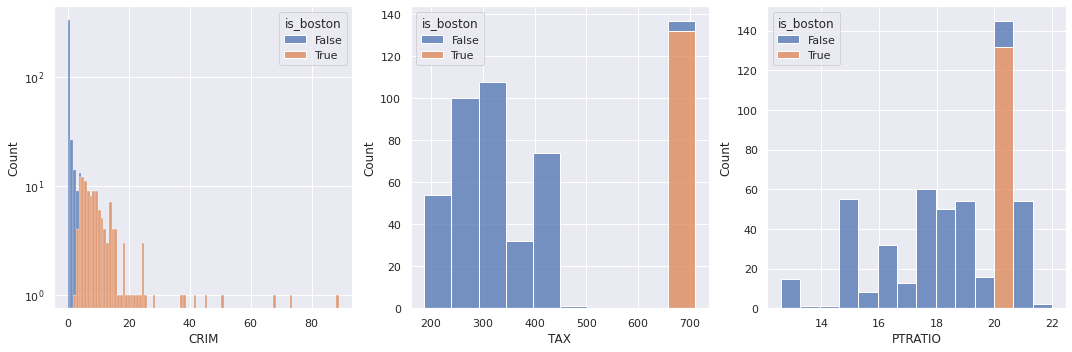

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axs = axs.flatten()
for ax, x in zip(axs, ['CRIM', 'TAX', 'PTRATIO']):
  sns.histplot(bostondf.assign(is_boston=is_weird_cluster)
              , x=x
              , hue='is_boston'
              , multiple='stack'
              , ax=ax
              )
axs[0].set_yscale('log')
plt.tight_layout()
plt.show()

The majority of suburbs are safe; the highest levels of crime are in the city of Boston. The city also seem to share the same values of `TAX` and `PTRATIO` for all its boroughs. I'll print out the rows with the highest values in `CRIM`, `TAX`, and `PTRATIO`.

In [12]:
pd.DataFrame({'min' : bostondf[['CRIM', 'TAX', 'PTRATIO']].min()
              , 'max' : bostondf[['CRIM', 'TAX', 'PTRATIO']].max()
             }
)

,min,max
CRIM,0.00632,88.9762
TAX,187.00000,711.0000
PTRATIO,12.60000,22.0000


# (e)

From the textbook, p. 56:
> How many of the suburbs in this data set bound the Charles
river?

In [13]:
(bostondf.CHAS == 1).sum()

35

# (f)

From the textbook, p. 57:
> What is the median pupil-teacher ratio among the towns in this
data set?

In [14]:
bostondf.PTRATIO.median()

19.05

# (g)

From the textbook, p. 57:
> Which suburb of Boston has lowest median value of owner-occupied homes? What are the values of the other predictors
for that suburb, and how do those values compare to the overall
ranges for those predictors? Comment on your findings.

In [15]:
pd.DataFrame({'MIN' : bostondf.min()
              , 'MAX' : bostondf.max()
              , 'HAS_MIN_MEDV' : bostondf.loc[bostondf.MEDV.idxmin()]
             }
).T

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
MIN,0.00632,0.0,0.46,0.0,0.385,3.561,2.9,1.1296,1.0,187.0,12.6,0.32,1.73,5.0
MAX,88.97620,100.0,27.74,1.0,0.871,8.780,100.0,12.1265,24.0,711.0,22.0,396.90,37.97,50.0
HAS_MIN_MEDV,38.35180,0.0,18.10,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59,5.0


* `CRIM` &mdash; per capita crime rate &mdash; quite high;
* `ZN` &mdash; proportion of residential land zoned for lots over 25,000 sq.ft. &mdash; the lowest possible value;
* `INDUS` &mdash; proportion of non-retail business acres &mdash; towards the higher bound;
* `CHAS` &mdash; Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) &mdash; this is categorical (does not have the river);
* `NOX` &mdash; nitric oxides concentration (parts per 10 million) &mdash; quite high;
* `RM` &mdash; average number of rooms per dwelling &mdash; medium;
* `AGE` &mdash; proportion of owner-occupied units built prior to 1940 &mdash; the highest possible value (100%);
* `DIS` &mdash; weighted distances to five Boston employment centres &mdash; surpisingly low;
* `RAD` &mdash; index of accessibility to radial highways &mdash; the highest possible value;
* `TAX` &mdash; full-value property-tax rate per \$10,000 &mdash; close to the maximum;
* `PTRATIO` &mdash; pupil-teacher ratio by town &mdash; close to the maximum;
* `B` &mdash; 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town &mdash; the highest possible;
* `LSTAT` &mdash; % lower status of the population &mdash; close to the maximum.

# (h)

From the textbook, p. 57:
> In this data set, how many of the suburbs average more than
seven rooms per dwelling? More than eight rooms per dwelling?
Comment on the suburbs that average more than eight rooms
per dwelling.

In [16]:
is_rm_more_than_7 = bostondf.RM > 7
print(f'Towns with more than 7 rooms per dwelling on average: {is_rm_more_than_7.sum()}')
is_rm_more_than_8 = bostondf.RM > 8
print(f'Towns with more than 8 rooms per dwelling on average: {is_rm_more_than_8.sum()}')

Towns with more than 7 rooms per dwelling on average: 64
Towns with more than 8 rooms per dwelling on average: 13


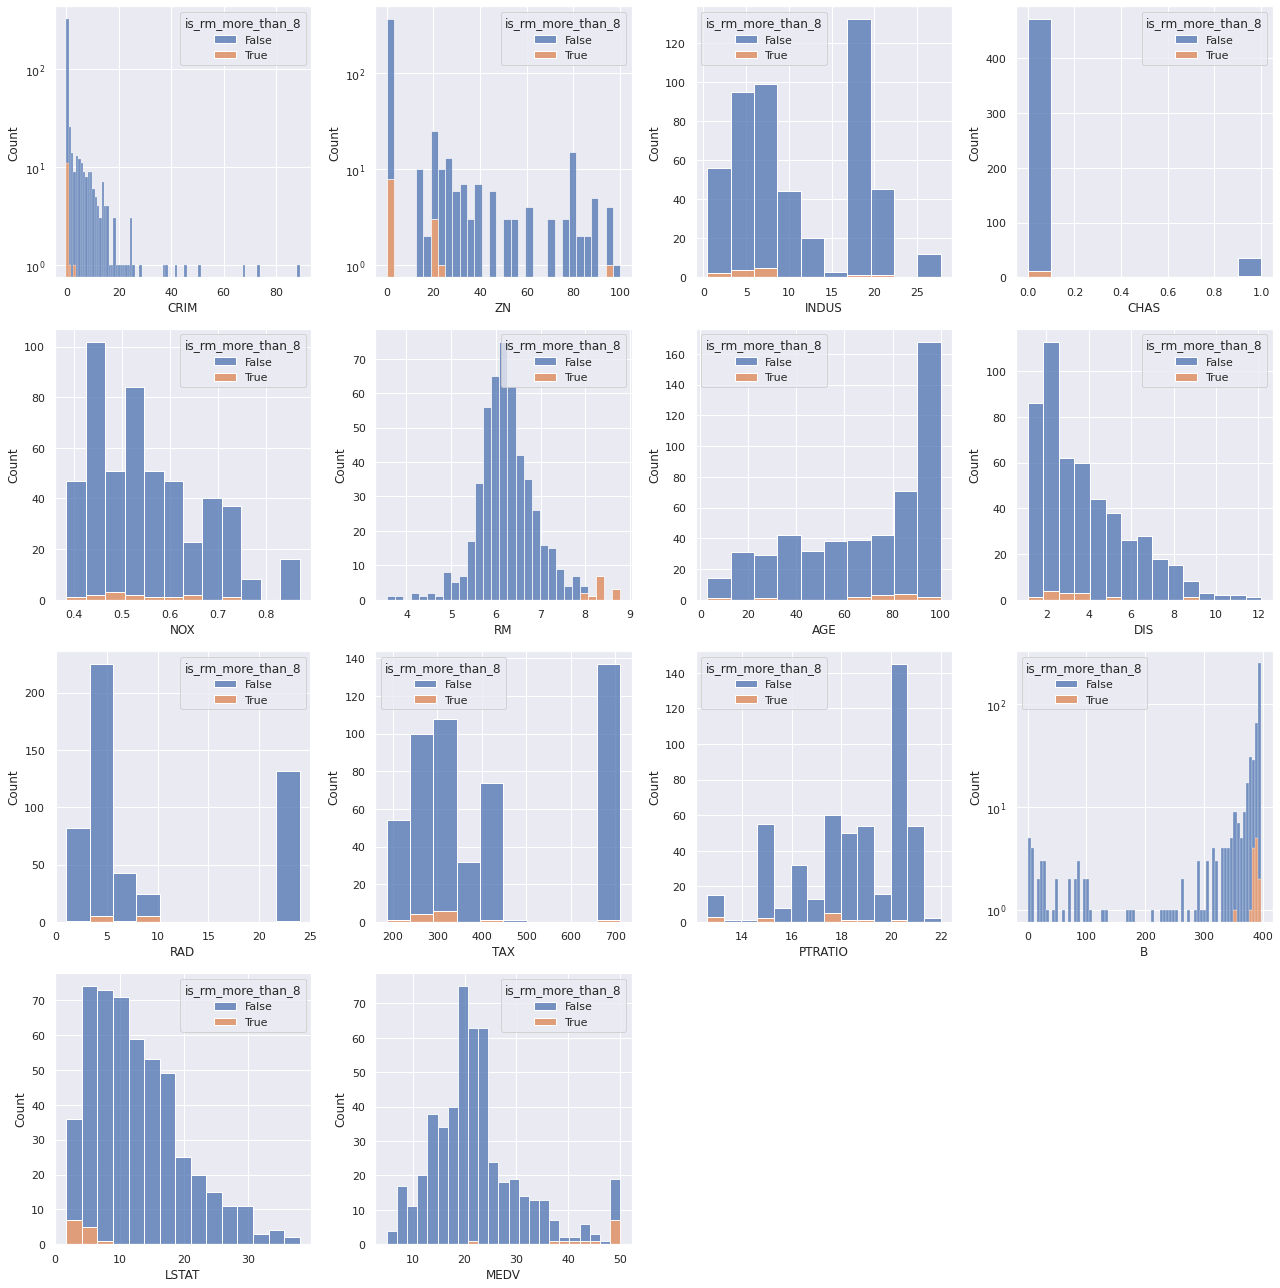

In [17]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(18, 18))
axs = axs.flatten()
for ax, x in zip(axs, bostondf.columns):
  sns.histplot(bostondf.assign(is_rm_more_than_8=is_rm_more_than_8)
              , x=x
              , hue='is_rm_more_than_8'
              , multiple='stack'
              , ax=ax
              )
  
for i in [0, 1, 11]:  
  axs[i].set_yscale('log')
plt.tight_layout()
for i in range(14, 16):
  fig.delaxes(axs[i])
plt.show()

Column-by-column comment:
* `CRIM` &mdash; lower than the majority;
* `ZN` &mdash; with one exception, lower than the majority;
* `INDUS` &mdash; with two exceptions, lower than the majority;
* `CHAS` &mdash; none of these towns bound Charles River;
* `NOX` &mdash; the towns have different levels of NOX, from relatively low to relatively high;
* `AGE` &mdash; the majority of these towns have large proportion of old buildings;
* `DIS` &mdash; the majority of these towns are close to employment centers;
* `RAD` &mdash; can be at any level;
* `TAX` &mdash; with one exception, lower than the majority;
* `PTRATIO` &mdash; can be at any level;
* `B` &mdash; high. These are white-majority communities;
* `LSTAT` &mdash; low;
* `MEDV` &mdash; high, with one exception (which is medium).